# First homework in the course - Clustering

In this homework I chose a Ski resorts dataset to demonstreate K Means clustering. 

Data: https://www.kaggle.com/datasets/thomasnibb/european-ski-resortsí


### Business case

My goal is to examine the european ski resorts in order to make recommendation to different types of visitors.


### Relevant questions

+ Which ski resorts are suitable for families with kids or beginners?
+ Which ski resorts are suitable for skiers who want to challenge themselves?
+ Which ski resorts have the most capacity?
+ Is there any correlation between capacity and price?
+ Where to go with a lower budget?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn import mixture
import seaborn as sns
from clustering_tools import clustering_tools as ct

## Load the data

In [2]:
data_path = "European_Ski_Resorts.csv"
input_data = ct.load_ski_resorts_data(data_path)
input_data.head()

,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
Resort,,,,,,,,,,,,,
Alpendorf (Ski amedé),1980,740,52,30,81,4,115,22,16,11,49,75398,600
Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​Canillo/​Encamp (Grandvalira),2640,1710,47,100,77,33,210,37,28,7,72,99017,1032
Oberau (Wildschönau),1130,900,30,1,0,1,2,2,0,0,2,1932,0
Dachstein West,1620,780,42,15,33,3,51,25,8,3,36,32938,163
Rosa Khutor,2320,940,22,30,26,21,77,6,11,10,27,49228,450


In [3]:
feature_columns=list(input_data.columns)

## Data Preparation

To prepare the data for clustering I created the prepare_input_data_for_clustering function, which transforms the dataset in three steps:

### 1. Remove skewness
In the first step, we have to take into account the skewness of our variables. Long tail variables usually have a higher variance, and this confuses the clustering algorithm. A possible solution to this is to take the logarithm of these long tail variables.

### 2. Standardization

After removing skewness, we have to deal with the difference in the variance of the variables. To solve this problem we have to standardize the dataset.

### 3. PCA

The third thing that can cause problems is that the features are correlated with each other. The solution to this problem is dimensionality reduction. One option we can use is Principal Component Analysis. PCA deconstruct the dataset into orthogonal vectors, and can also tell us which features contribute to wich vector.

In [4]:
pca, input_data_prepared = ct.prepare_input_data_for_clustering(input_data, 5)
input_data_prepared

array([[-2.57540684, -1.36787726,  0.80873057, -0.58859852, -0.65231943],
       [-4.32848085,  0.40157363, -0.74404965, -0.71690153,  0.15818834],
       [ 5.39763767,  0.29728602,  0.35646594,  0.1682764 , -0.24411521],
       ...,
       [-2.49804679,  0.75413452,  0.77246381, -0.85087255,  0.68737741],
       [-2.49804679,  0.75413452,  0.77246381, -0.85087255,  0.68737741],
       [-0.57490932, -0.06369175,  0.83396708, -0.49792225, -0.51540329]])

In [5]:
# TODO: duplikáció
principal_components=pd.DataFrame(pca.components_,index=np.arange(5),columns=feature_columns).transpose()
principal_components

,0,1,2,3,4
HighestPoint,-0.229559,0.571570,0.097128,-0.022001,0.030769
LowestPoint,-0.115509,0.723222,-0.316207,-0.123926,-0.102230
DayPassPriceAdult,-0.235111,0.113365,0.604303,0.048733,-0.416436
BeginnerSlope,-0.316346,-0.075079,-0.163434,0.040095,0.211428
IntermediateSlope,-0.323195,-0.006960,-0.027083,0.107226,0.150045
DifficultSlope,-0.298309,0.025116,0.042838,0.126008,0.521008
TotalSlope,-0.333967,-0.008319,-0.103976,0.094121,0.171145
SurfaceLifts,-0.285201,-0.248672,-0.323672,0.092902,-0.276515
ChairLifts,-0.311062,-0.115823,-0.069019,0.030179,0.128382
GondolaLifts,-0.256064,-0.045800,0.582862,0.007516,0.114970


In [6]:
principal_components=pd.DataFrame(pca.components_,index=np.arange(5),columns=feature_columns).transpose()
principal_components

,0,1,2,3,4
HighestPoint,-0.229559,0.571570,0.097128,-0.022001,0.030769
LowestPoint,-0.115509,0.723222,-0.316207,-0.123926,-0.102230
DayPassPriceAdult,-0.235111,0.113365,0.604303,0.048733,-0.416436
BeginnerSlope,-0.316346,-0.075079,-0.163434,0.040095,0.211428
IntermediateSlope,-0.323195,-0.006960,-0.027083,0.107226,0.150045
DifficultSlope,-0.298309,0.025116,0.042838,0.126008,0.521008
TotalSlope,-0.333967,-0.008319,-0.103976,0.094121,0.171145
SurfaceLifts,-0.285201,-0.248672,-0.323672,0.092902,-0.276515
ChairLifts,-0.311062,-0.115823,-0.069019,0.030179,0.128382
GondolaLifts,-0.256064,-0.045800,0.582862,0.007516,0.114970


To see the results of PCA I created a heatmap:

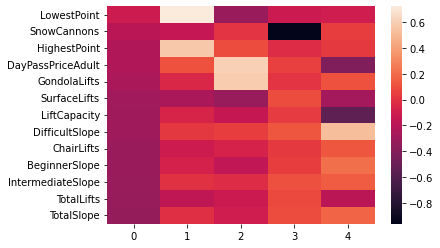

In [7]:
import seaborn as sns
ax = sns.heatmap(principal_components.sort_values(0,ascending=False))

Other important step is to name the pricipal components:

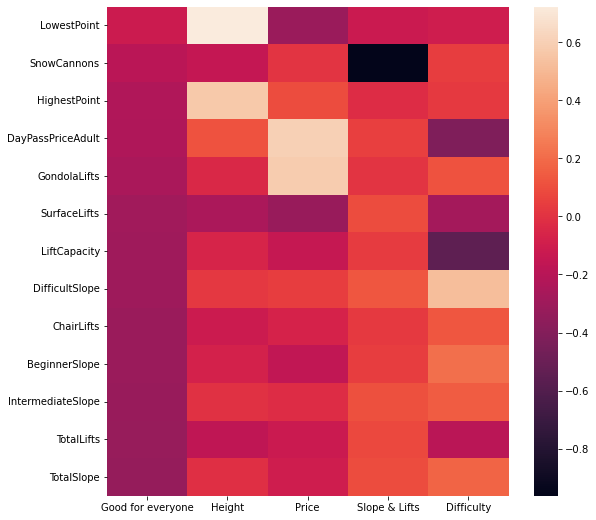

In [8]:
component_names=["Good for everyone","Height","Price","Slope & Lifts","Difficulty"]
principal_components.columns=component_names
fig,axes=plt.subplots(1,1,figsize=(9,9))
axes = sns.heatmap(principal_components.sort_values("Good for everyone",ascending=False),ax=axes)

In [9]:
input_data_prepared = pd.DataFrame(input_data_prepared)
input_data_prepared.columns = component_names
input_data_prepared

,Good for everyone,Height,Price,Slope & Lifts,Difficulty
0,-2.575407,-1.367877,0.808731,-0.588599,-0.652319
1,-4.328481,0.401574,-0.744050,-0.716902,0.158188
2,5.397638,0.297286,0.356466,0.168276,-0.244115
3,-0.825440,-1.359257,-0.139504,-0.393552,-0.707107
4,-1.341633,-0.493252,-0.120938,-0.826015,1.366832
...,...,...,...,...,...
371,-4.435079,0.355845,-0.417180,2.139188,0.828003
372,-4.435079,0.355845,-0.417180,2.139188,0.828003
373,-2.498047,0.754135,0.772464,-0.850873,0.687377
374,-2.498047,0.754135,0.772464,-0.850873,0.687377


## Clustering

Now the dataset is ready for clustering. Since I have chisen K-means clustering, I needed to decide beforehand the number of clusters. I chose 5 as a start.

After clustering I plotted the data on a scatterplot with the two seemingly most important features and their cluster as the color.

In [10]:
kmeans = KMeans(n_clusters=5, random_state=0,max_iter=3000).fit(input_data_prepared)
input_data_prepared["CLUSTERING_1"] = kmeans.labels_
input_data_prepared["CLUSTERING_1"].value_counts()

0    149
4     91
2     71
1     57
3      8
Name: CLUSTERING_1, dtype: int64

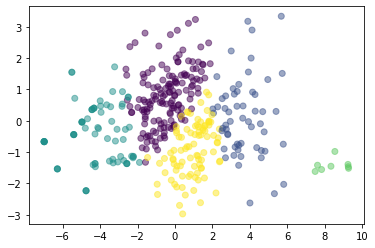

In [11]:
input_data_prepared["CLUSTERING_1"]=kmeans.labels_
input_data_prepared["CLUSTERING_1"]=kmeans.labels_

plt.scatter(input_data_prepared["Good for everyone"],
            input_data_prepared["Height"],c=input_data_prepared["CLUSTERING_1"],alpha=0.5)

I grouped the features according to their substantive meanings and use boxplot to visualize the difference between the clusters.

In [12]:
height_features = ["HighestPoint","LowestPoint"]
price_features = ["DayPassPriceAdult"]
slope_features =  ["BeginnerSlope", "IntermediateSlope", "DifficultSlope", "TotalSlope"]
lifts_features = ["SurfaceLifts", "ChairLifts", "GondolaLifts", "TotalLifts", "LiftCapacity"]
snowcannons_features = ["SnowCannons"]

feature_groups = {
    "height_features" : height_features,
    "price_features": price_features,
    "slope_features": slope_features,
    "lifts_features": lifts_features,
    "snowcannons_features" : snowcannons_features,
}



In [13]:
for name, group in feature_groups.items():
    create_boxplot_for_feature_group(group,name,input_data_prepared)

NameError: name 'create_boxplot_for_feature_group' is not defined

### Cluster 0 - Average - high mountains
+ above average mountains
+ average price
+ average slope
+ average lift capacity
+ average number of snowcannons

### Cluster 1 - For beginners
+ low mountains
+ below average price
+ fewer slope
+ fewer lift capacity
+ few snowcannons

### Cluster 2 - Deluxe
+ high mountains
+ expensive
+ large number of slopes
+ high capacity of lifts
+ a lot of snowcannons

### Cluster 3 - Low grade
+ lowest mountains
+ cheapest
+ fewest slopes
+ fewest lift capacity
+ fewest snowcannons

### Cluster 4 - Average low mountains
+ low mountains
+ average price
+ average slope
+ average lift capacity
+ average - few number of snowcannons